<a href="https://colab.research.google.com/github/GhaziDhouafli/Data_Science_In_Marketing/blob/main/AI_in_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-Import Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
import plotly.express as px
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense,Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as k
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
import plotly.express as px
import plotly.graph_objects as go

from google.colab import files

In [ ]:
sales_df= pd.read_csv('/content/sales_data_sample.csv',encoding='unicode_escape')

In [ ]:
sales_df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
sales_df['ORDERDATE']=pd.to_datetime(sales_df['ORDERDATE'])

In [ ]:
df_drop=['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CITY','TERRITORY','PHONE','STATE','CONTACTFIRSTNAME','CONTACTLASTNAME','CUSTOMERNAME','ORDERNUMBER','ORDERDATE']
sales_df=sales_df.drop(df_drop, axis= 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
sales_df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
STATUS             0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
sales_df.to_csv('sales_data.csv', index=False)

2-Data Analysis

In [ ]:
df_drop=['STATUS']
sales_df=sales_df.drop(df_drop, axis= 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,2,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,3,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,3,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,4,10,2003,Motorcycles,95,S10_1678,USA,Medium


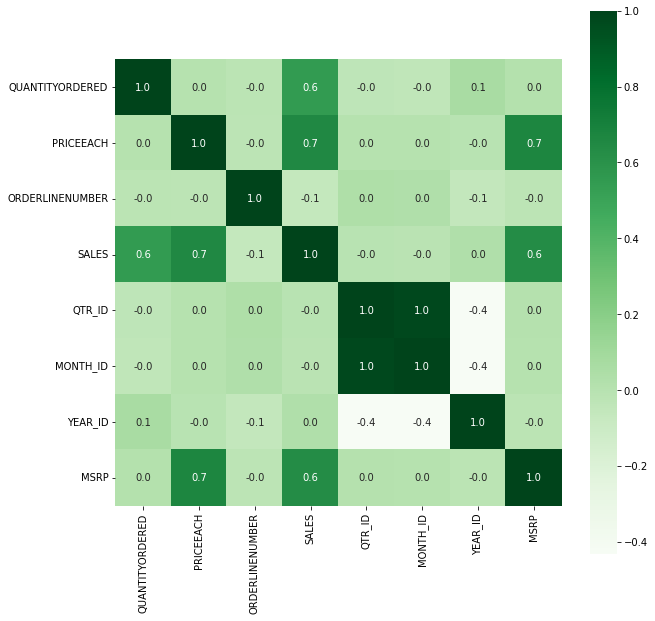

In [ ]:
correlation = sales_df.iloc[:,:10].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square= True, fmt='.1f',annot=True,annot_kws={'size':10},cmap='Greens')

We can see that we do have a 1.0 score when it comes to MONTH_ID and QTR_ID, so we can definetly get rid of the QTR_ID column

In [ ]:
df_drop=['QTR_ID']
sales_df=sales_df.drop(df_drop, axis= 1)
sales_df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2,2003,Motorcycles,95,S10_1678,USA,Small
1,34,81.35,5,2765.90,5,2003,Motorcycles,95,S10_1678,France,Small
2,41,94.74,2,3884.34,7,2003,Motorcycles,95,S10_1678,France,Medium
3,45,83.26,6,3746.70,8,2003,Motorcycles,95,S10_1678,USA,Medium
4,49,100.00,14,5205.27,10,2003,Motorcycles,95,S10_1678,USA,Medium


In [ ]:
y=pd.Categorical(sales_df['PRODUCTCODE']).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [ ]:
sales_df['PRODUCTCODE']=pd.Categorical(sales_df['PRODUCTCODE']).codes

In [ ]:
def dummies(x):
  dummy=pd.get_dummies(sales_df[x])
  sales_df.drop(columns= x, inplace= True)
  return pd.concat([sales_df, dummy], axis=1)

In [ ]:
sales_df=dummies('COUNTRY')

In [ ]:
sales_df=dummies('PRODUCTLINE')

In [ ]:
sales_df=dummies('DEALSIZE')

In [ ]:
sales_df

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12,2004,54,108,0,0,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,1,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,3,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,3,2005,54,108,0,0,...,0,0,0,1,0,0,0,0,0,1


3-Create the Model

In [ ]:
scaler= StandardScaler()
sales_df_scaled=scaler.fit_transform(sales_df)

In [ ]:
sales_df_scaled.shape

(2823, 37)

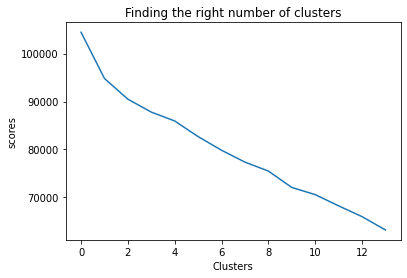

In [ ]:
sum_destination=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(sales_df_scaled)
  sum_destination.append(kmeans.inertia_)

plt.plot(sum_destination)
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [ ]:
#from keras.optimizers import SGD

input_df=Input(shape=(37,))
x=Dense(50, activation='relu')(input_df)
x=Dense(500, activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(500, activation='relu',kernel_initializer='glorot_uniform')(x)
x=Dense(2000, activation='relu',kernel_initializer='glorot_uniform')(x)
encoded= Dense(8, activation='relu', kernel_initializer='glorot_uniform')(x)
x=Dense(2000, activation='relu',kernel_initializer='glorot_uniform')(encoded)
x=Dense(500, activation='relu',kernel_initializer='glorot_uniform')(x)
decoded= Dense(37, kernel_initializer='glorot_uniform')(x)


autoencoder=Model(input_df, decoded)
encoder=Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
autoencoder.fit(sales_df, sales_df, batch_size=128, epochs=500, verbose=3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [ ]:
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred=encoder.predict(sales_df_scaled)

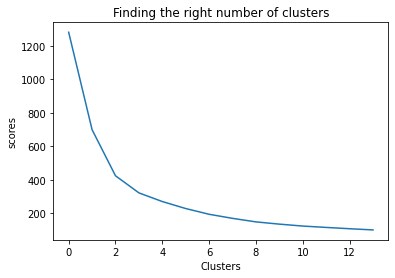

In [ ]:
sum_destination=[]
for i in range(1,15):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(pred)
  sum_destination.append(kmeans.inertia_)

plt.plot(sum_destination)
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

In [ ]:
kmeans=KMeans(3)
kmeans.fit(pred)
labels=kmeans.labels_
y_kmeans=kmeans.fit_predict(sales_df_scaled)

In [ ]:
df_cluster_dr=pd.concat([sales_df, pd.DataFrame({'cluster:labels'})],axis=1)
df_cluster_dr.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small,0
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,cluster:labels
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,1,0,0,0,0,0,0,0,1,NaN
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,NaN
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,NaN
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,1,0,0,0,0,0,0,1,0,NaN


In [ ]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_, columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.91210
1,0.293073,0.580208,-0.010805,0.458608,0.003368,-0.012482,0.376634,-0.165542,-0.013717,0.010642,...,0.085141,-0.014094,-0.048853,-0.020232,-0.052121,0.064221,-0.064346,-0.242672,1.019676,-0.91210
2,-0.468912,-0.724370,0.043454,-0.810304,0.007142,-0.003285,-0.581757,0.285478,0.025174,-0.016801,...,-0.162957,0.013781,0.072858,0.058660,0.071986,-0.044714,0.087993,-0.242672,-0.980703,1.09637


In [ ]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[sales_df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15
1,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,7.424616e-16,1.000000e+00,-3.885781e-16
2,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,6.869505e-16,-1.110223e-15,1.000000e+00


In [ ]:
pca=PCA(n_components=3)
prin_comp=pca.fit_transform(sales_df_scaled)
pca_df=pd.DataFrame(data= prin_comp, columns=['pca1','pca2','pca3'])
pca_df.head()

,pca1,pca2,pca3
0,-0.486199,-1.183956,0.923893
1,-0.784581,-1.008544,1.342877
2,1.431572,0.143572,0.183636
3,1.288594,-0.204677,-0.635577
4,1.976186,-0.121868,-1.070580


In [ ]:
pca_df=pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486199,-1.183956,0.923893,1
1,-0.784581,-1.008544,1.342877,1
2,1.431572,0.143572,0.183636,2
3,1.288594,-0.204677,-0.635577,2
4,1.976186,-0.121868,-1.070580,2


In [ ]:
fig=px.scatter_3d(pca_df, x='pca1',y='pca2',z='pca3', color='cluster',symbol='cluster',size_max=10, opacity=0.7)
fig.update_layout(margin= dict(l=0, r=0, b=0, t=0))